In [ ]:
import os
import sys
import pandas as pd

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.encoder import Encoder
from homecredit.model import Modeling

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier

import pickle

# Load models from pickle file

In [4]:
# Load model from pickle file
my_model = pickle.load(open("models.pckl","rb"))

my_model

[{'Name ': 'LR',
  'Model ': LogisticRegression(max_iter=1000),
  ' scoring': 'accuracy',
  ' train score': 0.9134809092893548,
  'time_run (mins)': 2.852945601940155},
 {'Name ': 'DTC',
  'Model ': DecisionTreeClassifier(),
  ' scoring': 'accuracy',
  ' train score': 0.8442406603005219,
  'time_run (mins)': 7.018933931986491}]

# Call data to predict

In [12]:
# this cell includes data to predict after transformation : clening missvalues, removing outliers, encoding
EN = Encoder(data_set='test')
EN.data.shape

(39431, 121)

# Model Prediction for new data

In [5]:
ml = Modeling()

In [6]:
ml.data.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [7]:
res = ml.predict_newdata(LogisticRegression(max_iter=1000))

In [8]:
res

{'Predictions ': array([0, 0, 0, ..., 0, 0, 0])}

In [11]:
res['Predictions '].shape

(39431,)

In [13]:
res['Predictions '][:5]

array([0, 0, 0, 0, 0])

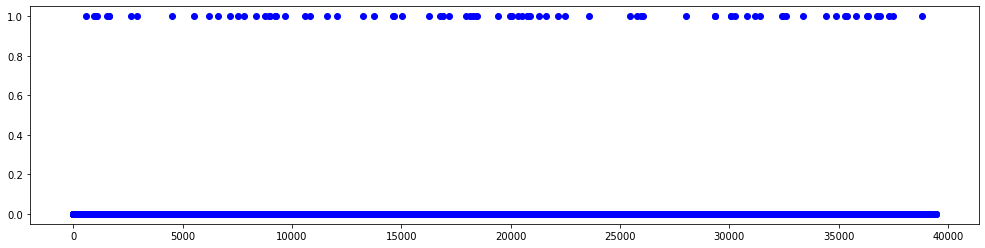

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (17, 4))

y = res['Predictions ']
plt.plot(range(0, len(y)),y , 'bo') 

In [28]:
df = pd.DataFrame(data=y, columns=["target"])
targ = 'target'
df

,target
0,0
1,0
2,0
3,0
4,0
...,...
39426,0
39427,0
39428,0
39429,0


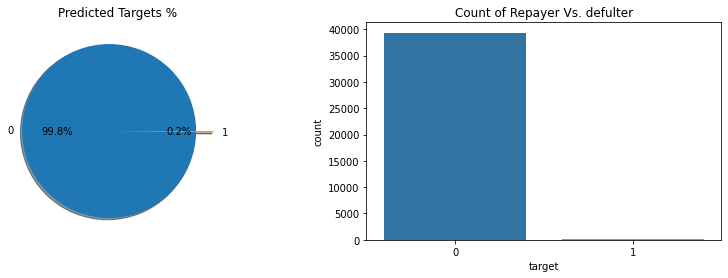

In [30]:
dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=ax[0])
ax[0].set_title("Predicted Targets %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()

# Deploying a predictive model as an API

In [ ]:
# Creating the function which can take inputs and return predictions

def prediction()




In [ ]:
def prediction(test_csv_url):
    
    df = pd.read_csv(test_csv_url)
    
    # Load model from pickle file
    my_model = pickle.load(open("models.pckl","rb"))

    ml.predict(best_model = LogisticRegression(max_iter=1000), best_scoring='accuracy')
    
    
    prediction_lda = clf_lda.predict(X_test)
    
    clf_nn = load(MODEL_PATH_NN)
    prediction_nn = clf_nn.predict(X_test)
    
    return {'prediction LDA': int(prediction_lda), 'prediction Neural Network': int(prediction_nn)}


In [ ]:
df_test = pd.read_csv("../raw_data/application_test.csv")
df_train = pd.read_csv("../raw_data/application_train.csv")


In [ ]:
df_test.shape, df_train.shape

In [ ]:
for col in en.prep.get_catcols(): #catcols
    print(col, "***test**", len(df_test[col].unique()), "***train**", len(df_train[col].unique()))

In [ ]:
col = 'NAME_INCOME_TYPE'
df_test[col].unique()

In [ ]:
df_train[col].unique()